# __Mini Projet Apprentissage Artificiel__ 

We start by importing all the modules we will use in this notebook.
We will use __sklearn__ as our main framework for ML.

In [1]:
import numpy as np
import pandas as pd 
import scipy.io
import sklearn
from matplotlib import pyplot as plt
from urllib.request import urlretrieve
import zipfile
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics

We then load our data and vizualize it.

In [2]:
# path = "./Projet_Expression.zip"
# urlretrieve("https://moodle.psl.eu/pluginfile.php/614743/mod_resource/content/14/Projet_Expression.zip",path)
# with zipfile.ZipFile(path,'r') as zip_ref:
#     zip_ref.extractall("./Projet_Expression")

data_matrix = scipy.io.loadmat("./gliome.mat")
X = data_matrix['X']
y = data_matrix['Y'][:, 0] 

print(f"The data has the dimension : \n • Input size : {X.shape} \n • Output size : {y.shape}")

The data has the dimension : 
 • Input size : (50, 4434) 
 • Output size : (50,)


In [3]:
df = pd.DataFrame(X)
df['y'] = y
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4425,4426,4427,4428,4429,4430,4431,4432,4433,y
0,1.877947,1.301030,1.950365,2.765147,2.383456,1.935003,1.805501,1.489958,1.949878,1.984977,...,3.593485,1.686636,1.301030,1.309630,2.062958,1.332438,2.113275,2.609381,3.687966,1
1,2.651036,2.290211,2.436589,2.427530,2.818690,2.228490,2.174424,2.106459,2.091490,2.137432,...,3.498401,2.493015,1.766260,1.869179,2.238474,1.301030,1.929475,2.519645,3.951704,1
2,2.221108,2.302321,3.045137,2.438125,2.462685,1.971209,2.288998,1.436299,2.041398,2.232764,...,3.586848,2.300823,1.886583,1.806535,1.301030,1.861657,1.301030,1.301030,3.705766,1
3,2.168830,2.125105,2.993723,2.253585,2.675738,2.120541,2.464906,1.484127,1.978128,2.364278,...,3.498593,2.439544,1.881537,1.934864,1.301030,1.301030,1.301030,1.838071,3.826369,1
4,2.575785,1.705988,2.513637,2.906606,2.578367,2.200210,2.367455,1.959123,1.897500,1.956192,...,3.437832,2.224660,1.593090,1.761575,1.301030,1.602045,1.410159,1.847608,4.082294,1


In [61]:
value_counts = df['y'].value_counts()
print(value_counts)


y
4    15
1    14
3    14
2     7
Name: count, dtype: int64


This problem is a supervised classification problem. 
We will try 2 different models to classify our data into 4 differents classes (gliome types)

First we need to split our data into 3 sets : Train, Validation, Test
In order to compare performances on different training set, we will generate 2 triplets of sets.

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X) 

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.4,random_state=84, stratify=y)
# X_train_1, X_valid_1, y_train_1, y_valid_1 = train_test_split(X_temp_1, y_temp_1, test_size= 0.3)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2,random_state=7, stratify=y)
# X_train_2, X_valid_2, y_train_2, y_valid_2 = train_test_split(X_temp_1, y_temp_1, test_size= 0.3)

Text(0.5, 0, 'Train Labels 2')

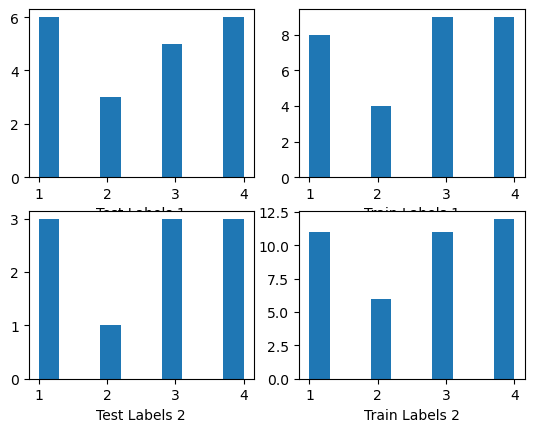

In [74]:
plt.subplot(2, 2, 1)
plt.hist(y_test_1)
plt.xlabel('Test Labels 1')
plt.subplot(2, 2, 2)
plt.hist(y_train_1)
plt.xlabel('Train Labels 1')
plt.subplot(2, 2, 3)
plt.hist(y_test_2)
plt.xlabel('Test Labels 2')
plt.subplot(2, 2, 4)
plt.hist(y_train_2)
plt.xlabel('Train Labels 2')


### Random Forest Decision Tree Classifier (RFD)

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

clf = RandomForestClassifier()

In [85]:
print("RESULTS ON FIRST SET TRAIN/TEST")
print(clf)
clf = clf.fit(X_train_1, y_train_1)
score = clf.score(X_test_1, y_test_1)
print("Acuracy (on test set) = ", score)
y_true, y_pred = y_test_1, clf.predict(X_test_1)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )

RESULTS ON FIRST SET TRAIN/TEST
RandomForestClassifier()
Acuracy (on test set) =  0.75
              precision    recall  f1-score   support

           1       0.71      0.83      0.77         6
           2       1.00      0.33      0.50         3
           3       0.75      0.60      0.67         5
           4       0.75      1.00      0.86         6

    accuracy                           0.75        20
   macro avg       0.80      0.69      0.70        20
weighted avg       0.78      0.75      0.73        20


 CONFUSION MATRIX
[[5 0 1 0]
 [2 1 0 0]
 [0 0 3 2]
 [0 0 0 6]]


In [86]:
print("RESULTS ON SECOND SET TRAIN/TEST")
print(clf)
clf = clf.fit(X_train_2, y_train_2)
score = clf.score(X_test_2, y_test_2)
print("Acuracy (on test set) = ", score)
y_true, y_pred = y_test_2, clf.predict(X_test_2)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )

RESULTS ON SECOND SET TRAIN/TEST
RandomForestClassifier()
Acuracy (on test set) =  0.8
              precision    recall  f1-score   support

           1       0.67      0.67      0.67         3
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3

    accuracy                           0.80        10
   macro avg       0.67      0.67      0.67        10
weighted avg       0.80      0.80      0.80        10


 CONFUSION MATRIX
[[2 1 0 0]
 [1 0 0 0]
 [0 0 3 0]
 [0 0 0 3]]


In [110]:
from sklearn import model_selection

params = {
        'criterion' : ['entropy','gini'],
        'n_estimators': [100, 125, 150, 175, 200],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2],
        'min_samples_leaf': [1, 2, 3],
        'max_features' : ['log2','sqrt',None]
        }

RFC = RandomForestClassifier(n_jobs=-1)
grid_cv = model_selection.GridSearchCV(RFC,param_grid= params,cv = 5,scoring='accuracy',verbose=10)
grid_cv.fit(X_train_1,y_train_1)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV 1/5; 1/270] START criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 1/270] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.833 total time=   0.1s
[CV 2/5; 1/270] START criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100


c:\Users\pierr\miniconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[CV 2/5; 1/270] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.667 total time=   0.1s
[CV 3/5; 1/270] START criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/5; 1/270] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.833 total time=   0.1s
[CV 4/5; 1/270] START criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 4/5; 1/270] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.500 total time=   0.1s
[CV 5/5; 1/270] START criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 5/5; 1/270] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 20, 30],
                         'max_features': ['log2', 'sqrt', None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2],
                         'n_estimators': [100, 125, 150, 175, 200]},
             scoring='accuracy', verbose=10)

In [114]:
best_DTC = grid_cv.best_estimator_
best_params = grid_cv.best_params_
print(best_params)
best_DTC = best_DTC.fit(X_train_1, y_train_1)

# Evaluate acuracy on test data
print(best_DTC)
score = best_DTC.score(X_test_1, y_test_1)
print("Acuracy (on test set) = ", score)
y_true, y_pred = y_test_1,best_DTC.predict(X_test_1)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )

{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 175}
RandomForestClassifier(max_depth=10, max_features=None, min_samples_leaf=2,
                       n_estimators=175, n_jobs=-1)
Acuracy (on test set) =  0.75
              precision    recall  f1-score   support

           1       0.71      0.83      0.77         6
           2       1.00      0.33      0.50         3
           3       0.75      0.60      0.67         5
           4       0.75      1.00      0.86         6

    accuracy                           0.75        20
   macro avg       0.80      0.69      0.70        20
weighted avg       0.78      0.75      0.73        20


 CONFUSION MATRIX
[[5 0 1 0]
 [2 1 0 0]
 [0 0 3 2]
 [0 0 0 6]]


## __MultiLayer Perceptron Classifier (MLPC)__

In [ ]:
from sklearn.neural_network import MLPClassifier

In [136]:

param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'max_iter': [500, 1000, 1500],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'random_state': [42]
}

# Create a neural network classifier
model = MLPClassifier()

# Perform GridSearchCV for hyperparameter tuning
grid_search = model_selection.GridSearchCV(model, param_grid, cv=5, scoring='accuracy',verbose=10)
grid_search.fit(X_train_1, y_train_1)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5; 1/216] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42


c:\Users\pierr\miniconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5; 1/216] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42;, score=1.000 total time=   0.3s
[CV 2/5; 1/216] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42
[CV 2/5; 1/216] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42;, score=0.500 total time=   0.3s
[CV 3/5; 1/216] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42
[CV 3/5; 1/216] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42;, score=0.500 total time=   0.2s
[CV 4/5; 1/216] START activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=500, random_state=42
[CV 4/5; 1/216] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0

c:\Users\pierr\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 115/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=500, random_state=42;, score=0.833 total time=   5.4s
[CV 1/5; 116/216] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=1000, random_state=42
[CV 1/5; 116/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=1000, random_state=42;, score=0.833 total time=   0.3s
[CV 2/5; 116/216] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=1000, random_state=42
[CV 2/5; 116/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=1000, random_state=42;, score=0.500 total time=   0.3s
[CV 3/5; 116/216] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=1000, random_state=42
[CV 3/5; 116/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate

c:\Users\pierr\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 1/5; 133/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.1, max_iter=500, random_state=42;, score=0.833 total time=   5.2s
[CV 2/5; 133/216] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.1, max_iter=500, random_state=42


c:\Users\pierr\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 133/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.1, max_iter=500, random_state=42;, score=0.833 total time=   5.6s
[CV 3/5; 133/216] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.1, max_iter=500, random_state=42
[CV 3/5; 133/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.1, max_iter=500, random_state=42;, score=0.667 total time=   0.3s
[CV 4/5; 133/216] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.1, max_iter=500, random_state=42


c:\Users\pierr\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 4/5; 133/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.1, max_iter=500, random_state=42;, score=0.667 total time=   5.7s
[CV 5/5; 133/216] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.1, max_iter=500, random_state=42


c:\Users\pierr\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 133/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.1, max_iter=500, random_state=42;, score=0.833 total time=   5.7s
[CV 1/5; 134/216] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.1, max_iter=1000, random_state=42
[CV 1/5; 134/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.1, max_iter=1000, random_state=42;, score=0.833 total time=   7.8s
[CV 2/5; 134/216] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.1, max_iter=1000, random_state=42
[CV 2/5; 134/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.1, max_iter=1000, random_state=42;, score=0.833 total time=   7.8s
[CV 3/5; 134/216] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(50, 50), learning_rate_init=0.1, max_iter=1000, random_state=42
[CV 3/5; 134/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(5

c:\Users\pierr\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 142/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=500, random_state=42;, score=0.833 total time=  10.5s
[CV 1/5; 143/216] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=1000, random_state=42
[CV 1/5; 143/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=1000, random_state=42;, score=1.000 total time=   0.7s
[CV 2/5; 143/216] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=1000, random_state=42
[CV 2/5; 143/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=1000, random_state=42;, score=0.833 total time=   0.7s
[CV 3/5; 143/216] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=1000, random_state=42
[CV 3/5; 143/216] END activation=tanh, alpha=0.0001, hidden_layer_si

c:\Users\pierr\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 143/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=1000, random_state=42;, score=1.000 total time=  21.9s
[CV 1/5; 144/216] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=1500, random_state=42
[CV 1/5; 144/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=1500, random_state=42;, score=1.000 total time=   0.8s
[CV 2/5; 144/216] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=1500, random_state=42
[CV 2/5; 144/216] END activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=1500, random_state=42;, score=0.833 total time=   0.7s
[CV 3/5; 144/216] START activation=tanh, alpha=0.0001, hidden_layer_sizes=(100, 50), learning_rate_init=0.1, max_iter=1500, random_state=42
[CV 3/5; 144/216] END activation=tanh, alpha=0.0001, hidden_layer_s

c:\Users\pierr\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 3/5; 184/216] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42;, score=0.667 total time=   4.5s
[CV 4/5; 184/216] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42
[CV 4/5; 184/216] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42;, score=0.667 total time=   4.0s
[CV 5/5; 184/216] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42
[CV 5/5; 184/216] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500, random_state=42;, score=0.500 total time=   2.4s
[CV 1/5; 185/216] START activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=1000, random_state=42
[CV 1/5; 185/216] END activation=tanh, alpha=0.01, hidden_layer_sizes=(50,), learning_rate_init=0.01, 

c:\Users\pierr\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 2/5; 193/216] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42;, score=0.667 total time=   9.7s
[CV 3/5; 193/216] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42
[CV 3/5; 193/216] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42;, score=0.667 total time=   0.2s
[CV 4/5; 193/216] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42
[CV 4/5; 193/216] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42;, score=0.667 total time=   0.3s
[CV 5/5; 193/216] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42


c:\Users\pierr\miniconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV 5/5; 193/216] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=500, random_state=42;, score=0.833 total time=  10.9s
[CV 1/5; 194/216] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=1000, random_state=42
[CV 1/5; 194/216] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=1000, random_state=42;, score=1.000 total time=   0.2s
[CV 2/5; 194/216] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=1000, random_state=42
[CV 2/5; 194/216] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=1000, random_state=42;, score=0.667 total time=  10.7s
[CV 3/5; 194/216] START activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=1000, random_state=42
[CV 3/5; 194/216] END activation=tanh, alpha=0.01, hidden_layer_sizes=(100,), learning_rate_

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (100,), (50, 50),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [500, 1000, 1500], 'random_state': [42]},
             scoring='accuracy', verbose=10)

In [20]:
best_MLP = grid_search.best_estimator_
best_params = grid_search.best_params_
print(best_params)
best_MLP = best_MLP.fit(X_train_2, y_train_2)

# Evaluate acuracy on test data
print(best_MLP)
score = best_MLP.score(X_test_2, y_test_2)
print("Acuracy (on test set) = ", score)
y_true, y_pred = y_test_2,best_MLP.predict(X_test_2)
print( classification_report(y_true, y_pred) )
print("\n CONFUSION MATRIX")
print( confusion_matrix(y_true, y_pred) )

NameError: name 'grid_search' is not defined

### Regularized Logistic Regression ###

We will then use a pipeline containing a standardisation step of the data, followed by their fitting with a regularized logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

C = 2
penalty='l2'
lreg = LogisticRegression(penalty=penalty, C=C, max_iter=200)
pip = Pipeline([('scaler', StandardScaler()), ('lreg', lreg)])

              precision    recall  f1-score   support

           1       0.83      0.83      0.83         6
           2       1.00      0.67      0.80         3
           3       0.80      0.80      0.80         5
           4       0.86      1.00      0.92         6

    accuracy                           0.85        20
   macro avg       0.87      0.82      0.84        20
weighted avg       0.86      0.85      0.85        20

Confusion matrix for the first set of training test


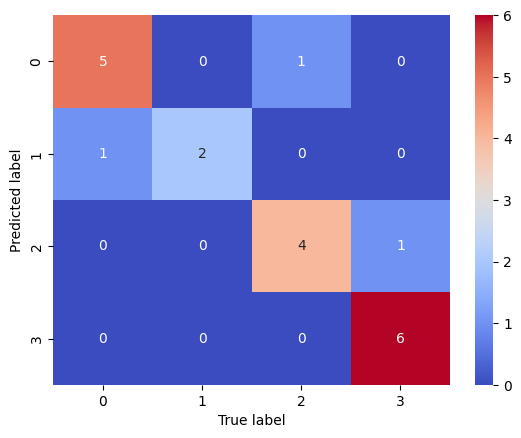

In [ ]:
pip.fit(X_train_1,y_train_1)
preds1 = pip.predict(X_test_1)

#Evaluation of the classifier
report = metrics.classification_report(y_true=y_test_1, y_pred=preds1)
print(report)
print(f"Confusion matrix for the first set of training test")
cm = metrics.confusion_matrix(y_true=y_test_1, y_pred=preds1)
ax = sns.heatmap(cm, cmap='coolwarm', annot=cm)
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')
plt.show()

              precision    recall  f1-score   support

           1       0.60      0.60      0.60         5
           2       1.00      0.33      0.50         3
           3       0.50      0.33      0.40         6
           4       0.40      0.67      0.50         6

    accuracy                           0.50        20
   macro avg       0.62      0.48      0.50        20
weighted avg       0.57      0.50      0.49        20

Confusion matrix for the second set of training test


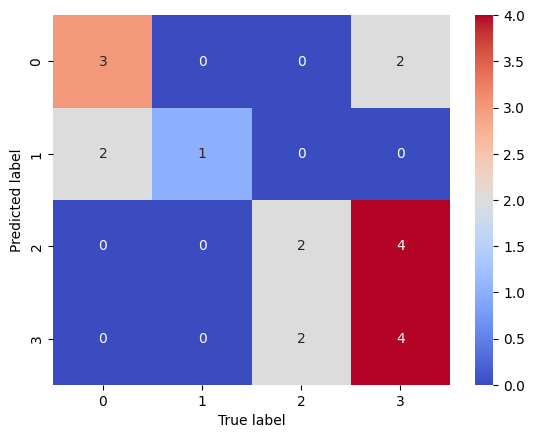

In [ ]:
pip.fit(X_train_2,y_train_2)
preds2 = pip.predict(X_test_2)

#Evaluation of the classifier
report = metrics.classification_report(y_true=y_test_2, y_pred=preds2)
print(report)
print(f"Confusion matrix for the second set of training test")
cm = metrics.confusion_matrix(y_true=y_test_2, y_pred=preds2)
ax = sns.heatmap(cm, cmap='coolwarm', annot=cm)
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')
plt.show()

We can see that the results are not satisfying, with accuracies that can greatly vary due to the small size of the data samples (between 50% to 100%). On the average the f1-score is near 75% but with great disparity between each class.

Among the very few data we have, we can see that the predictions can rapidly lead to a high rate of false predictions. Moreover, the data samples do not allow us to have equal data for all classes of grade.

### Test with k-nearest neighbors ###

Score : 0.83
              precision    recall  f1-score   support

           1       0.80      0.67      0.73         6
           2       0.67      0.67      0.67         3
           3       0.80      0.80      0.80         5
           4       0.86      1.00      0.92         6

    accuracy                           0.80        20
   macro avg       0.78      0.78      0.78        20
weighted avg       0.80      0.80      0.80        20

Confusion matrix for the first set of training test


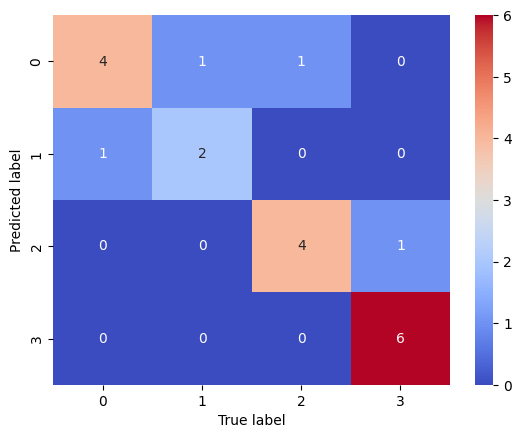

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_1,y_train_1)
print(f"Score : {KNeighborsClassifier.score(knn,X_train_1,y_train_1):.2f}")
preds1 = knn.predict(X_test_1)

#Evaluation of the classifier
report = metrics.classification_report(y_true=y_test_1, y_pred=preds1)
print(report)
print(f"Confusion matrix for the first set of training test")
cm = metrics.confusion_matrix(y_true=y_test_1, y_pred=preds1)
ax = sns.heatmap(cm, cmap='coolwarm', annot=cm)
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')
plt.show()

Score : 0.90
              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
           2       0.60      1.00      0.75         3
           3       0.67      0.33      0.44         6
           4       0.56      0.83      0.67         6

    accuracy                           0.65        20
   macro avg       0.71      0.69      0.65        20
weighted avg       0.71      0.65      0.63        20

Confusion matrix for the second set of training test


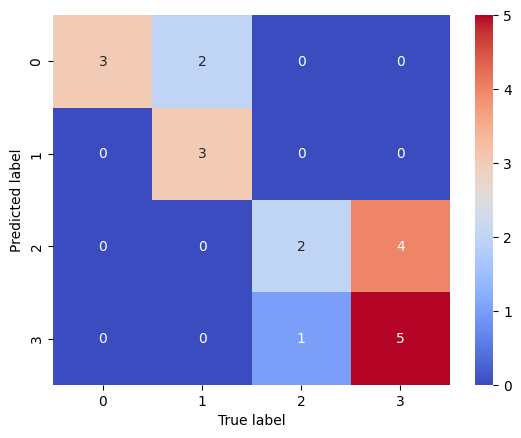

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_2,y_train_2)
print(f"Score : {KNeighborsClassifier.score(knn,X_train_2,y_train_2):.2f}")
preds2 = knn.predict(X_test_2)

#Evaluation of the classifier
report = metrics.classification_report(y_true=y_test_2, y_pred=preds2)
print(report)
print(f"Confusion matrix for the second set of training test")
cm = metrics.confusion_matrix(y_true=y_test_2, y_pred=preds2)
ax = sns.heatmap(cm, cmap='coolwarm', annot=cm)
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')
plt.show()

We can see that the results are not satisfying too.

We plot the confusion matrix to visualize the repartition of errors before using a grid search for optimizing the hyper-parameters

### Optimization of the hyper-parameters for the logistic regression ###

In [ ]:
from sklearn.model_selection import GridSearchCV


stsc = StandardScaler()
X_std_train_1 = stsc.fit_transform(X_train_1)

C = 2
penalty='l2'
lreg = LogisticRegression(penalty=penalty, C=C, max_iter=200)

lreg.fit(X_std_train_1,y_train_1)

param_grid = [
  {'C': np.linspace(1e-2,1,10),
   'penalty': ['l1', 'l2']}
 ]

# Cross-validation grid-search (for finding best possible accuracy)
clf = GridSearchCV( lreg,
                   param_grid, cv=3, scoring='accuracy')

clf.fit(X_std_train_1,y_train_1)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)

/Users/floren/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/floren/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/floren/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/floren/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    

Best parameters set found on development set:

{'C': 0.01, 'penalty': 'l2'}


In [ ]:
from sklearn.model_selection import GridSearchCV


stsc = StandardScaler()
X_std_train_2 = stsc.fit_transform(X_train_2)

C = 2
penalty='l2'
lreg = LogisticRegression(penalty=penalty, C=C, max_iter=200)

lreg.fit(X_std_train_2,y_train_2)

param_grid = [
  {'C': np.linspace(1e-2,1,10),
   'penalty': ['l1', 'l2']}
 ]

# Cross-validation grid-search (for finding best possible accuracy)
clf = GridSearchCV( lreg,
                   param_grid, cv=3, scoring='accuracy')

clf.fit(X_std_train_2,y_train_2)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)

/Users/floren/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/floren/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/floren/Library/Python/3.9/lib/python/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/floren/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    

Best parameters set found on development set:

{'C': 0.01, 'penalty': 'l2'}


              precision    recall  f1-score   support

           1       0.83      0.83      0.83         6
           2       1.00      0.67      0.80         3
           3       0.80      0.80      0.80         5
           4       0.86      1.00      0.92         6

    accuracy                           0.85        20
   macro avg       0.87      0.82      0.84        20
weighted avg       0.86      0.85      0.85        20

Confusion matrix for the first set of training test


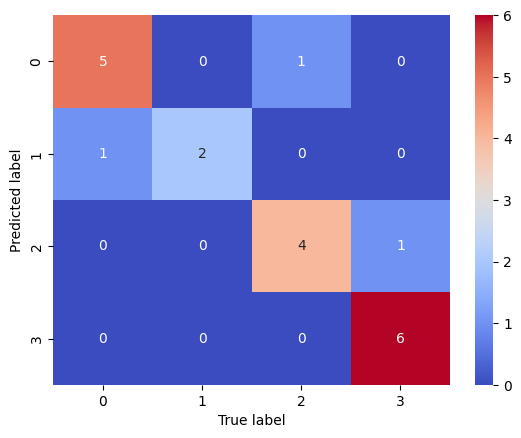

In [ ]:
C = clf.best_params_['C']
penalty = clf.best_params_['penalty']

lreg = LogisticRegression(penalty=penalty, C=C, max_iter=200)
pip = Pipeline([('scaler', StandardScaler()), ('lreg', lreg)])

pip.fit(X_train_1,y_train_1)
preds1 = pip.predict(X_test_1)

#Evaluation of the classifier
report = metrics.classification_report(y_true=y_test_1, y_pred=preds1)
print(report)

print(f"Confusion matrix for the first set of training test")
cm = metrics.confusion_matrix(y_true=y_test_1, y_pred=preds1)
ax = sns.heatmap(cm, cmap='coolwarm', annot=cm)
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')
plt.show()

              precision    recall  f1-score   support

           1       1.00      0.60      0.75         5
           2       0.60      1.00      0.75         3
           3       0.67      0.33      0.44         6
           4       0.56      0.83      0.67         6

    accuracy                           0.65        20
   macro avg       0.71      0.69      0.65        20
weighted avg       0.71      0.65      0.63        20

Confusion matrix for the second set of training test


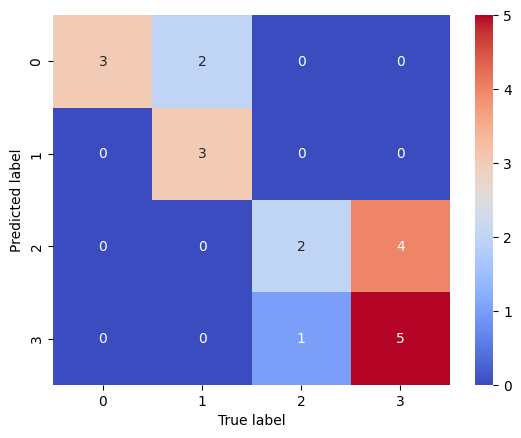

In [ ]:
lreg = LogisticRegression(penalty=penalty, C=C, max_iter=200)
pip = Pipeline([('scaler', StandardScaler()), ('lreg', lreg)])

pip.fit(X_train_2,y_train_2)
preds1 = pip.predict(X_test_2)

#Evaluation of the classifier
report = metrics.classification_report(y_true=y_test_2, y_pred=preds2)
print(report)

print(f"Confusion matrix for the second set of training test")
cm = metrics.confusion_matrix(y_true=y_test_2, y_pred=preds2)
ax = sns.heatmap(cm, cmap='coolwarm', annot=cm)
ax.set_xlabel('True label')
ax.set_ylabel('Predicted label')
plt.show()